![Astrofisica Computacional](../logo.PNG)

---
## 02. Ecuaciones Diferenciales Ordinarias I. Método de Euler para describir el Movimiento de un Cometa


Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### Resumen

En este cuaderno se presenta la aplicación del método de Euler al problema del movimiento de un cometa alrededor del Sol.

---

## Un Sistema Cometa-Sol

En este problema de aplicación se describe el movimiento de un cometa alrededor del Sol. Se considerará que la masa del cometa es mucho más pequeña que la masa del Sol, $m \ll M$, lo cual esta de acuerdo con la realidad. Por ejemplo, la masa del cometa Halley es $m \approx 2.2 \times 10^{14}$ kg, la cual es una cantidad muy pequeña comparada con la masa del Sol, $M \approx 1.9 \times 10^{30}$ kg.

Esta suposición implica que el cometa se moverá mientras que el Sol permanece estático en el origen de coordenadas. De esta forma, las ecuaciones de movimiento serán,

\begin{align}
\frac{d^2 x}{dt^2} = &- \frac{GM}{(x^2 + y^2)^{3/2}} x \\
\frac{d^2 y}{dt^2} = &- \frac{GM}{(x^2 + y^2)^{3/2}} y ,
\end{align}

donde se ha restringido el problema al plano de movimiento, con coordenadas $xy$. Para resolver este problema numéricamente se re-escribe el sistema de ecuaciones en la forma 

\begin{align}
\frac{d x}{dt} = &v^x \\
\frac{d y}{dt} = &v^y \\
\frac{dv^x}{dt} = &- \frac{GM}{(x^2 + y^2)^{3/2}} x \\
\frac{dv^y}{dt} = &- \frac{GM}{(x^2 + y^2)^{3/2}} y.
\end{align}


Una consideración importante tiene relación con las magnitudes de las cantidades y constantes físicas involucradas en el problema. Para el desarrollo, utilizaremos el siguiente sistema de unidades:

- Unidades de masa: Masas Solares $M_{\odot}$
- Unidades de distancia: unidades astronómicas [au]
- Unidades de tiempo: años [yr]

En este sistema de unidades, la constante gravitacional Newtoniana toma el valor $G = 4\pi^2$.

El sistema de ecuaciones diferenciales ordinarias se implementa mediante

In [1]:
import numpy as np

# Newtonian Gravitational Constant
G = 4.*np.pi**2
M = 1.

def f(t0, q0):
    '''
    ------------------------------------------
    f(t0, q0) 
    ------------------------------------------
    ODEs system for the motion of a comet 
    around the Sun using cartesian coordinates
    in the orbital plane.
    ------------------------------------------
    Arguments:
    t0: initial time
    q0: numpy array with the initial condition
        data:
        q0[0] = x
        q0[1] = y
        q0[2] = dx/dt
        q0[3] = dy/dt
    ------------------------------------------
    '''
    x = q0[0]
    y = q0[1]
    vx = q0[2]
    vy = q0[3]
    f = np.zeros(4)
    f[0] = vx
    f[1] = vy
    f[2] = - G*M*x/(x**2 + y**2)**(3/2)
    f[3] = - G*M*y/(x**2 + y**2)**(3/2)
    return f


--- 
##  Condición Inicial

Escoger la condición incial puede ser un aspecto crucial en el caso del probelma gravitacional de dos cuerpos. Una forma de establecer adecuadamente esta condición es utilizando las cantidades conservadas, que en este caso serán la energía, $E$, y el momento angular total, $l$,

\begin{equation}
E = \frac{1}{2} m \left[ (v^x)^2 + (v^y)^2\right] - \frac{GMm}{r} 
\end{equation}

\begin{equation}
\vec{l} = \vec{r} \times \vec{p} = m \vec{r} \times \vec{v}.
\end{equation}

Considerando que el movimeinto ocurre en el plano $x-y$ se tiene

\begin{equation}
l = x p^y - y p^x = m(x v^y - y v^x).
\end{equation}

##  Potencial Efectivo

Otra cantidad importante para tener en cuenta es el potencial efectivo, definido en la forma

\begin{equation}
V_{\text{eff}} (r) =  \frac{l^2}{2m^2r^2} - \frac{GM}{r}.
\end{equation}




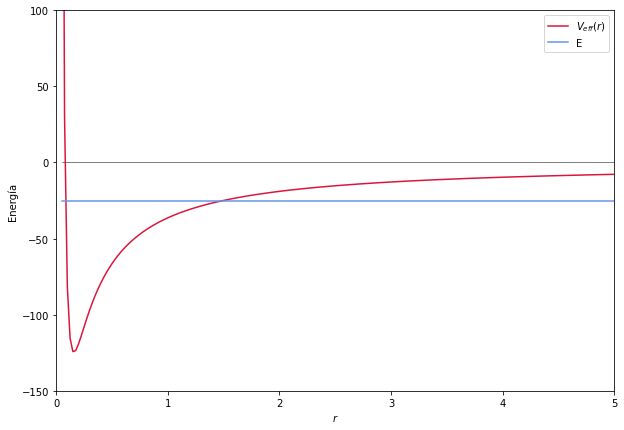

In [2]:
import matplotlib.pyplot as plt

def eff_potential(r, h, M=1.):
  return (h**2)/(2*r**2) - G/r

r = np.linspace(0.05,5.,200) 
plt.figure(figsize=(10,7))
plt.plot(r,np.zeros(len(r)),'k',linewidth=0.5)
plt.plot(r, eff_potential(r,h=2.5), color='crimson', label= r'$V_{eff}(r)$')
plt.plot(r,-25*np.ones(len(r)),color='cornflowerblue',linewidth=1.5, label='E')

plt.xlabel(r'$r$')
plt.ylabel(r'Energía')
plt.ylim(-150,100)
plt.xlim(0,5)
plt.legend()
plt.show()


### Condiciones para Movimiento Acotado (Trayectorias Elípticas o Circulares)

De las relaciones presentadas es posible imponer algunas relaciones para obtener la condición inicial para una clase de movimiento específico. Primero, debemos recordar que las trayectorias acotadas, para un valor fijo de momento angular, $l$, deben poseer una energía negativa, i.e. $E< 0$. Esto impone la restricción

\begin{equation}
\frac{E}{m} = \frac{1}{2} \left[(v^x)^2 + (v^y)^2\right] - \frac{GM}{r} < 0
\end{equation}
\begin{equation}
\left[(v^x)^2 + (v^y)^2\right]< \frac{2GM}{r}.
\end{equation}

Segundo, la energía total debe ser mayor (o igual) que el potencial efectivo para que exista movimiento. Esto implica que 

\begin{align}
\frac{E}{m} \geq &V_{\text{eff}} (r) \\
\frac{1}{2} \left[(v^x)^2 + (v^y)^2\right] - \frac{GM}{r}  \geq &\frac{l^2}{2m^2 r^2} - \frac{GM}{r}\\
\left[(v^x)^2 + (v^y)^2\right]  \geq &\frac{(x v^y - y v^x)^2}{ r^2}
\end{align}

### Escogiendo la Condición Inicial

Utilizando  $G= 4 \pi^2$ y $M = 1 M_{\odot}$, las condiciones impuestas arriba serán

\begin{equation}
    \begin{cases}
    \left[(v^x)^2 + (v^y)^2\right]< &\frac{8\pi^2}{r} \\
    \left[(v^x)^2 + (v^y)^2\right]  \geq &\frac{(x v^y - y v^x)^2}{ r^2}
    \end{cases}
\end{equation}


Ahora podemos escoger que, en $t=0$, las coordenadas del cometa sean $x = 1 \text{ au}$  y $y=0 \text{ au}$. Con ello se obtiene

\begin{equation}
    \begin{cases}
    (v^x)^2 + (v^y)^2&<  8\pi^2 \\
    (v^x)^2 &\geq  0.
    \end{cases}
\end{equation}

El signo de igualdad en la segunda ecuación corresponde a la orbita circular (si se está localizado en el mínimo del potencial efectivo) o en la ubicación de los puntos de retorno (ápsides). Por lo tanto, asumiendo que la condición inicial corresponderá a uno de los ápsis, se toma  $v^x = 0$ y tendremos solo una ecuación que liga la otra componente de la velocidad,

\begin{equation}
    v^y < 2\sqrt{2}\pi \approx  8.885766 \frac{\text{au}}{\text{yr}}.
\end{equation}

Resumiendo estos resultados, para obtener una orbita acotada para el movimiento del cometa, se impondrá la condición incial

\begin{equation}
    \begin{cases}
    x_0 = & 1\text{ au}\\
    y_0 = & 0 \\
    v^x = & 0 \\
    v^y = & 3\frac{\text{au}}{\text{yr}}.
    \end{cases}
\end{equation}

La malla temporal que se utilizará para aplicar el método de integración se definirá desde $t_0 = 0$ hasta $t_f = 20$ años. 

## Solución del Sistema de ODEs

A continuación se utilizará el método de Euler para resolver el problema diferencial.

In [4]:
def FEuler(f, h, t0, q0):
    '''
    ------------------------------------------
    FEuler(f, h, t0, h0)
    ------------------------------------------
    Forward Euler's method for solving a ODEs 
    system.
    ------------------------------------------
    Arguments:
    f : Function with the RHS of the ODEs
    h : stepsize for the iteration
    t0: initial time
    q0: NumPy array with the initial values of
        the functions in the ODEs system
    ------------------------------------------
    '''
    q1 = q0 + h*f(t0, q0)
    return q1



# Creation of the time grid (in years)
t_0 = 0.
t_f = 20.

# Number of steps in the grid
n = 100000

# Constant stepsize defined by the number of steps in the grid
dt = (t_f - t_0)/n

# Arrays to store the solution
t = np.linspace(t_0, t_f, n) # Time information
QE = np.zeros([n,4]) # Euler's Method information

# Initial Conditions
QE[0,0] = 1.
QE[0,1] = 0.
QE[0,2] = 0.
QE[0,3] = 3.
             
# Main loops for solving the problem
for i in range(1,n):
    q0 = QE[i-1]
    QE[i] = FEuler(f, dt, 0, q0)

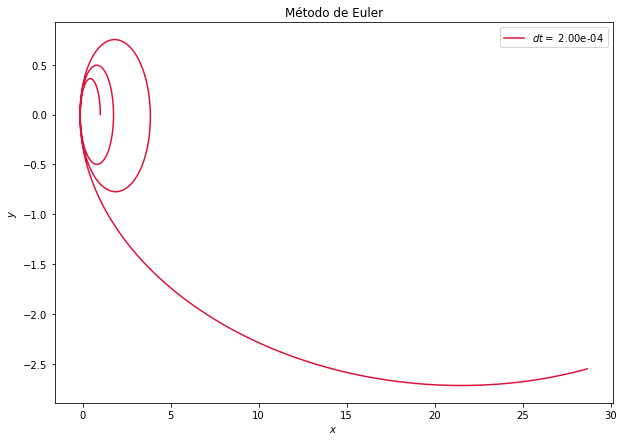

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(QE[:,0], QE[:,1], color='crimson', label=f'$dt =$ {dt:.2e}')
ax.set_title('Método de Euler')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()

plt.show()

DE la trayectoria obtnida es claro que el método no esta dando un buen resultado para los parámetros inciales establecidos. Para mejorar el comportamiento, reduciremos el valor del tamaño del paso de integración,

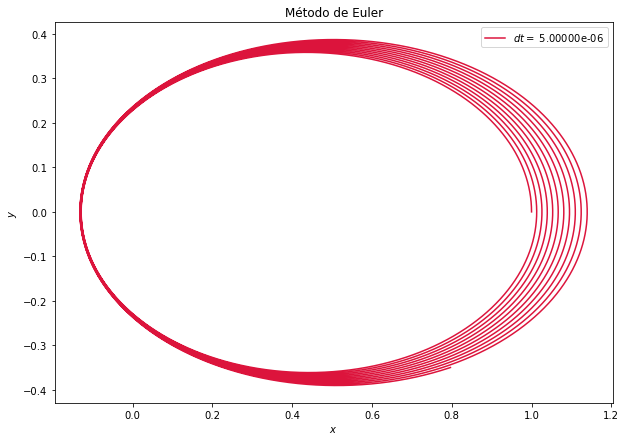

In [6]:
# Creation of the time grid (in years)
t_0 = 0.
t_f = 5.

# Number of steps in the grid (1 millon points!)
nI = 1000000

# Constant stepsize defined by the number of steps in the grid
dtI = (t_f - t_0)/nI

# Arrays to store the solution
tI = np.linspace(t_0, t_f, nI) # Time information
QEI = np.zeros([nI,4]) # Euler's Method information

# Initial Conditions
QEI[0,0] = 1.
QEI[0,1] = 0.
QEI[0,2] = 0.
QEI[0,3] = 3.
             
# Main loops for solving the problem
for i in range(1,nI):
    q0 = QEI[i-1]
    QEI[i] = FEuler(f, dtI, 0, q0)

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(QEI[:,0], QEI[:,1], color='crimson', label=f'$dt = $ {dtI:.5e}')
ax.set_title('Método de Euler')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()

plt.show()

Aún cuando el comportamiento no es el mejor, si se nota una mejoría comparado con el resultado anterior. Disminuyendo aún más el tamaño del paso se mejora la orbita calculada.

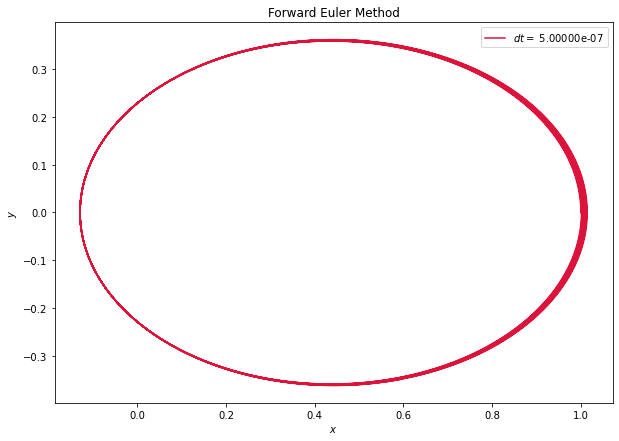

In [7]:
# Creation of the time grid (in years)
t_0 = 0.
t_f = 5.

# Number of steps in the grid (1 millon points!)
nII = 10000000

# Constant stepsize defined by the number of steps in the grid
dtII = (t_f - t_0)/nII

# Arrays to store the solution
tII = np.linspace(t_0, t_f, nII) # Time information
QEII = np.zeros([nII,4]) # Euler's Method information

# Initial Conditions
QEII[0,0] = 1.
QEII[0,1] = 0.
QEII[0,2] = 0.
QEII[0,3] = 3.
             
# Main loops for solving the problem
for i in range(1,nII):
    q0 = QEII[i-1]
    QEII[i] = FEuler(f, dtII, 0, q0)

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(QEII[:,0], QEII[:,1], color='crimson', label=f'$dt = $ {dtII:.5e}')
ax.set_title('Forward Euler Method')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()

plt.show()

---

Para analizár mejor el resultado, podemos calcular la energía y el momento angular del sistema para el intervalo de tiempo integrado,

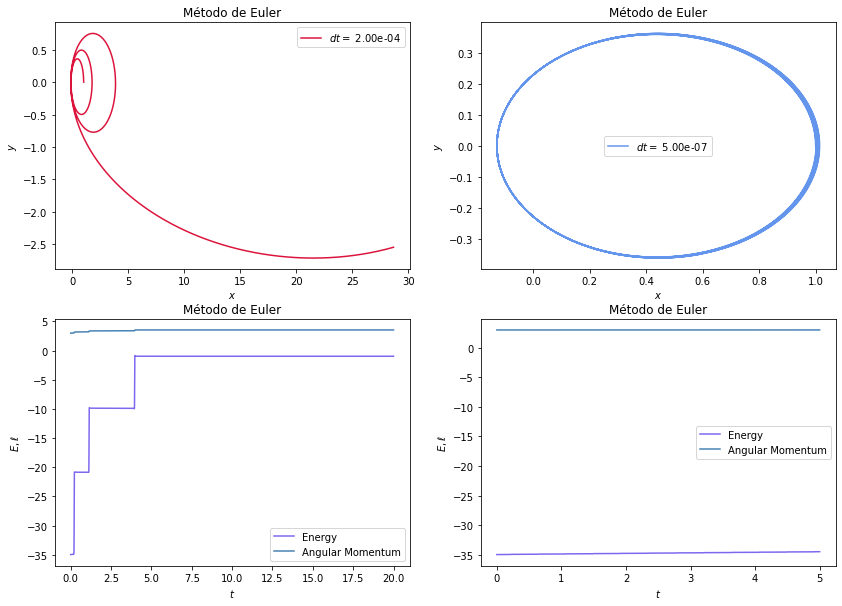

In [9]:
EnergyE = np.zeros(n)
AngMomE = np.zeros(n)

EnergyEII = np.zeros(nII)
AngMomEII = np.zeros(nII)

for i in range(n):
    speed2 = QE[i,2]**2 + QE[i,3]**2
    r = np.sqrt(QE[i,0]**2 + QE[i,1]**2)
    EnergyE[i] = speed2/2 - G*M/r
    AngMomE[i] = QE[i,0]*QE[i,3] - QE[i,1]*QE[i,2]

for i in range(nII):
    speed2 = QEII[i,2]**2 + QEII[i,3]**2
    r = np.sqrt(QEII[i,0]**2 + QEII[i,1]**2)
    EnergyEII[i] = speed2/2 - G*M/r
    AngMomEII[i] = QEII[i,0]*QEII[i,3] - QEII[i,1]*QEII[i,2]


fig, ax = plt.subplots(2,2, figsize=(14,10))
ax[0,0].plot(QE[:,0], QE[:,1], color='crimson', label=f'$dt=$ {dt:.2e}')
ax[0,0].set_title('Método de Euler')
ax[0,0].set_xlabel(r'$x$')
ax[0,0].set_ylabel(r'$y$')
ax[0,0].legend()

ax[0,1].plot(QEII[:,0], QEII[:,1], color='cornflowerblue', label=f'$dt=$ {dtII:.2e}')
ax[0,1].set_title('Método de Euler')
ax[0,1].set_xlabel(r'$x$')
ax[0,1].set_ylabel(r'$y$')
ax[0,1].legend()

ax[1,0].plot(t, EnergyE, color='mediumslateblue', label=f'Energy')
ax[1,0].plot(t, AngMomE, color='steelblue', label=f'Angular Momentum')
ax[1,0].set_title('Método de Euler')
ax[1,0].set_xlabel(r'$t$')
ax[1,0].set_ylabel(r'$E, \ell$')
ax[1,0].legend()

ax[1,1].plot(tII, EnergyEII, color='mediumslateblue', label=f'Energy')
ax[1,1].plot(tII, AngMomEII, color='steelblue', label=f'Angular Momentum')
ax[1,1].set_title('Método de Euler')
ax[1,1].set_xlabel(r'$t$')
ax[1,1].set_ylabel(r'$E, \ell$')
ax[1,1].legend()

plt.show()

These plots show clearly that the forward Euler's method with a not-so-small setpsize does not satisfies the conservation of energy (and produces a small increase in the angular momentum), while the RK4 do have a very good behavior.

In [11]:
print(f'El cambio en la energía utilizandoun paso de dt = {dt:.2e} :', np.abs(EnergyE[n-1] - EnergyE[0]))
print(f'\nEl cambio en la energía utilizandoun paso de dt = {dtII:.2e} :', np.abs(EnergyEII[n-1] - EnergyEII[0]))

El cambio en la energía utilizandoun paso de dt = 2.00e-04 : 34.01224429334252

El cambio en la energía utilizandoun paso de dt = 5.00e-07 : 2.4442463711693563e-05
